In [1]:
#pip install hickle

In [2]:
import numpy as np
from sampler import Sampler
from s_manager import SManager
import os, time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]


In [3]:
file_root = "/data/scratch/apw737/catall_nobright/viscatBC"
name = os.path.basename(file_root)
sampler = Sampler(seed=99, niter=10000, burn_in=10, best_type="mean", random_the_long_way=True, use_conj_grad=True, report_every=1000)
sampler.load_nr_sim(file_root, remove_redundancy=False) 

print(np.mean(sampler.vis_redcal.chi2["Jee"]))
print(sampler.vis_redcal.get_chi2(over_all=True))

#sampler.load_sim(20, 40, 40)

# Fourier mode setup for S
dc = lambda x, y: 1 if x==0 and y == 0 else 0
gauss = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)
random = lambda x, y: np.random.random(size=1)

sm = SManager(sampler.vis_redcal.ntime, sampler.vis_redcal.nfreq, sampler.vis_redcal.nant)
sm.generate_S(gauss, modes=2, ignore_threshold=0, zoom_from=(64, 64), scale=2)    # Contains all times/freqs

# V prior
V_mean = sampler.vis_redcal.V_model
Cv_diag = np.full(V_mean.shape[2]*2, 2)

sampler.set_S_and_V_prior(sm, V_mean, Cv_diag)

start = time.time()
#cProfile.run("sampler.run()", filename="sampler.prof", sort="cumulative")
sampler.run()


Loading NR sim from /data/scratch/apw737/catall_nobright/viscatBC
Get true model from /data/scratch/apw737/catall_nobright/viscatBC.uvh5


Telescope hera_sim is not in known_telescopes.


Get true gains from /data/scratch/apw737/catall_nobright/viscatBC.calfits
Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_g.uvh5
Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_g.uvh5
Get model from /data/scratch/apw737/catall_nobright/viscatBC_g_cal_dict.npz


telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


Get noise from /data/scratch/apw737/catall_nobright/viscatBC_nn.npz
0.9929261
0.9929260894244454
304 modes selected out of 4864 (6.0%)
Running sampling
Time accumulated: 0. Memory: 0.27 GB
Iter 0
Time accumulated: 0.58 s, 0.01 m, 0.0 h. Time since last report: 0.58 s, 0.01 m, 0.0 h.
Memory: 0.27 GB. Memory change since last report: 0.0 GB.


In [4]:
redcal_rms = sampler.vis_redcal.get_rms()
sampled_rms = sampler.vis_sampled.get_rms()
print("RMS", redcal_rms, ">", sampled_rms, "?")
if redcal_rms <= sampled_rms:
    print("Sampler has not improved the calibration")
else: print("Ok")
redcal_chi2 = sampler.vis_redcal.get_chi2(over_all=True)
sampled_chi2 = sampler.vis_sampled.get_chi2(over_all=True)
print("CHI2", redcal_chi2, ">", sampled_chi2, "?")
if redcal_chi2 <= sampled_chi2:
    print("Sampler has not improved the calibration")
else: print("Ok")

RMS 2.9517910002014593 > 2.9550995313934103 ?
Sampler has not improved the calibration
CHI2 0.9929260894244454 > 0.9949370499881368 ?
Sampler has not improved the calibration


Plot corner
g values: 8, V values: 4


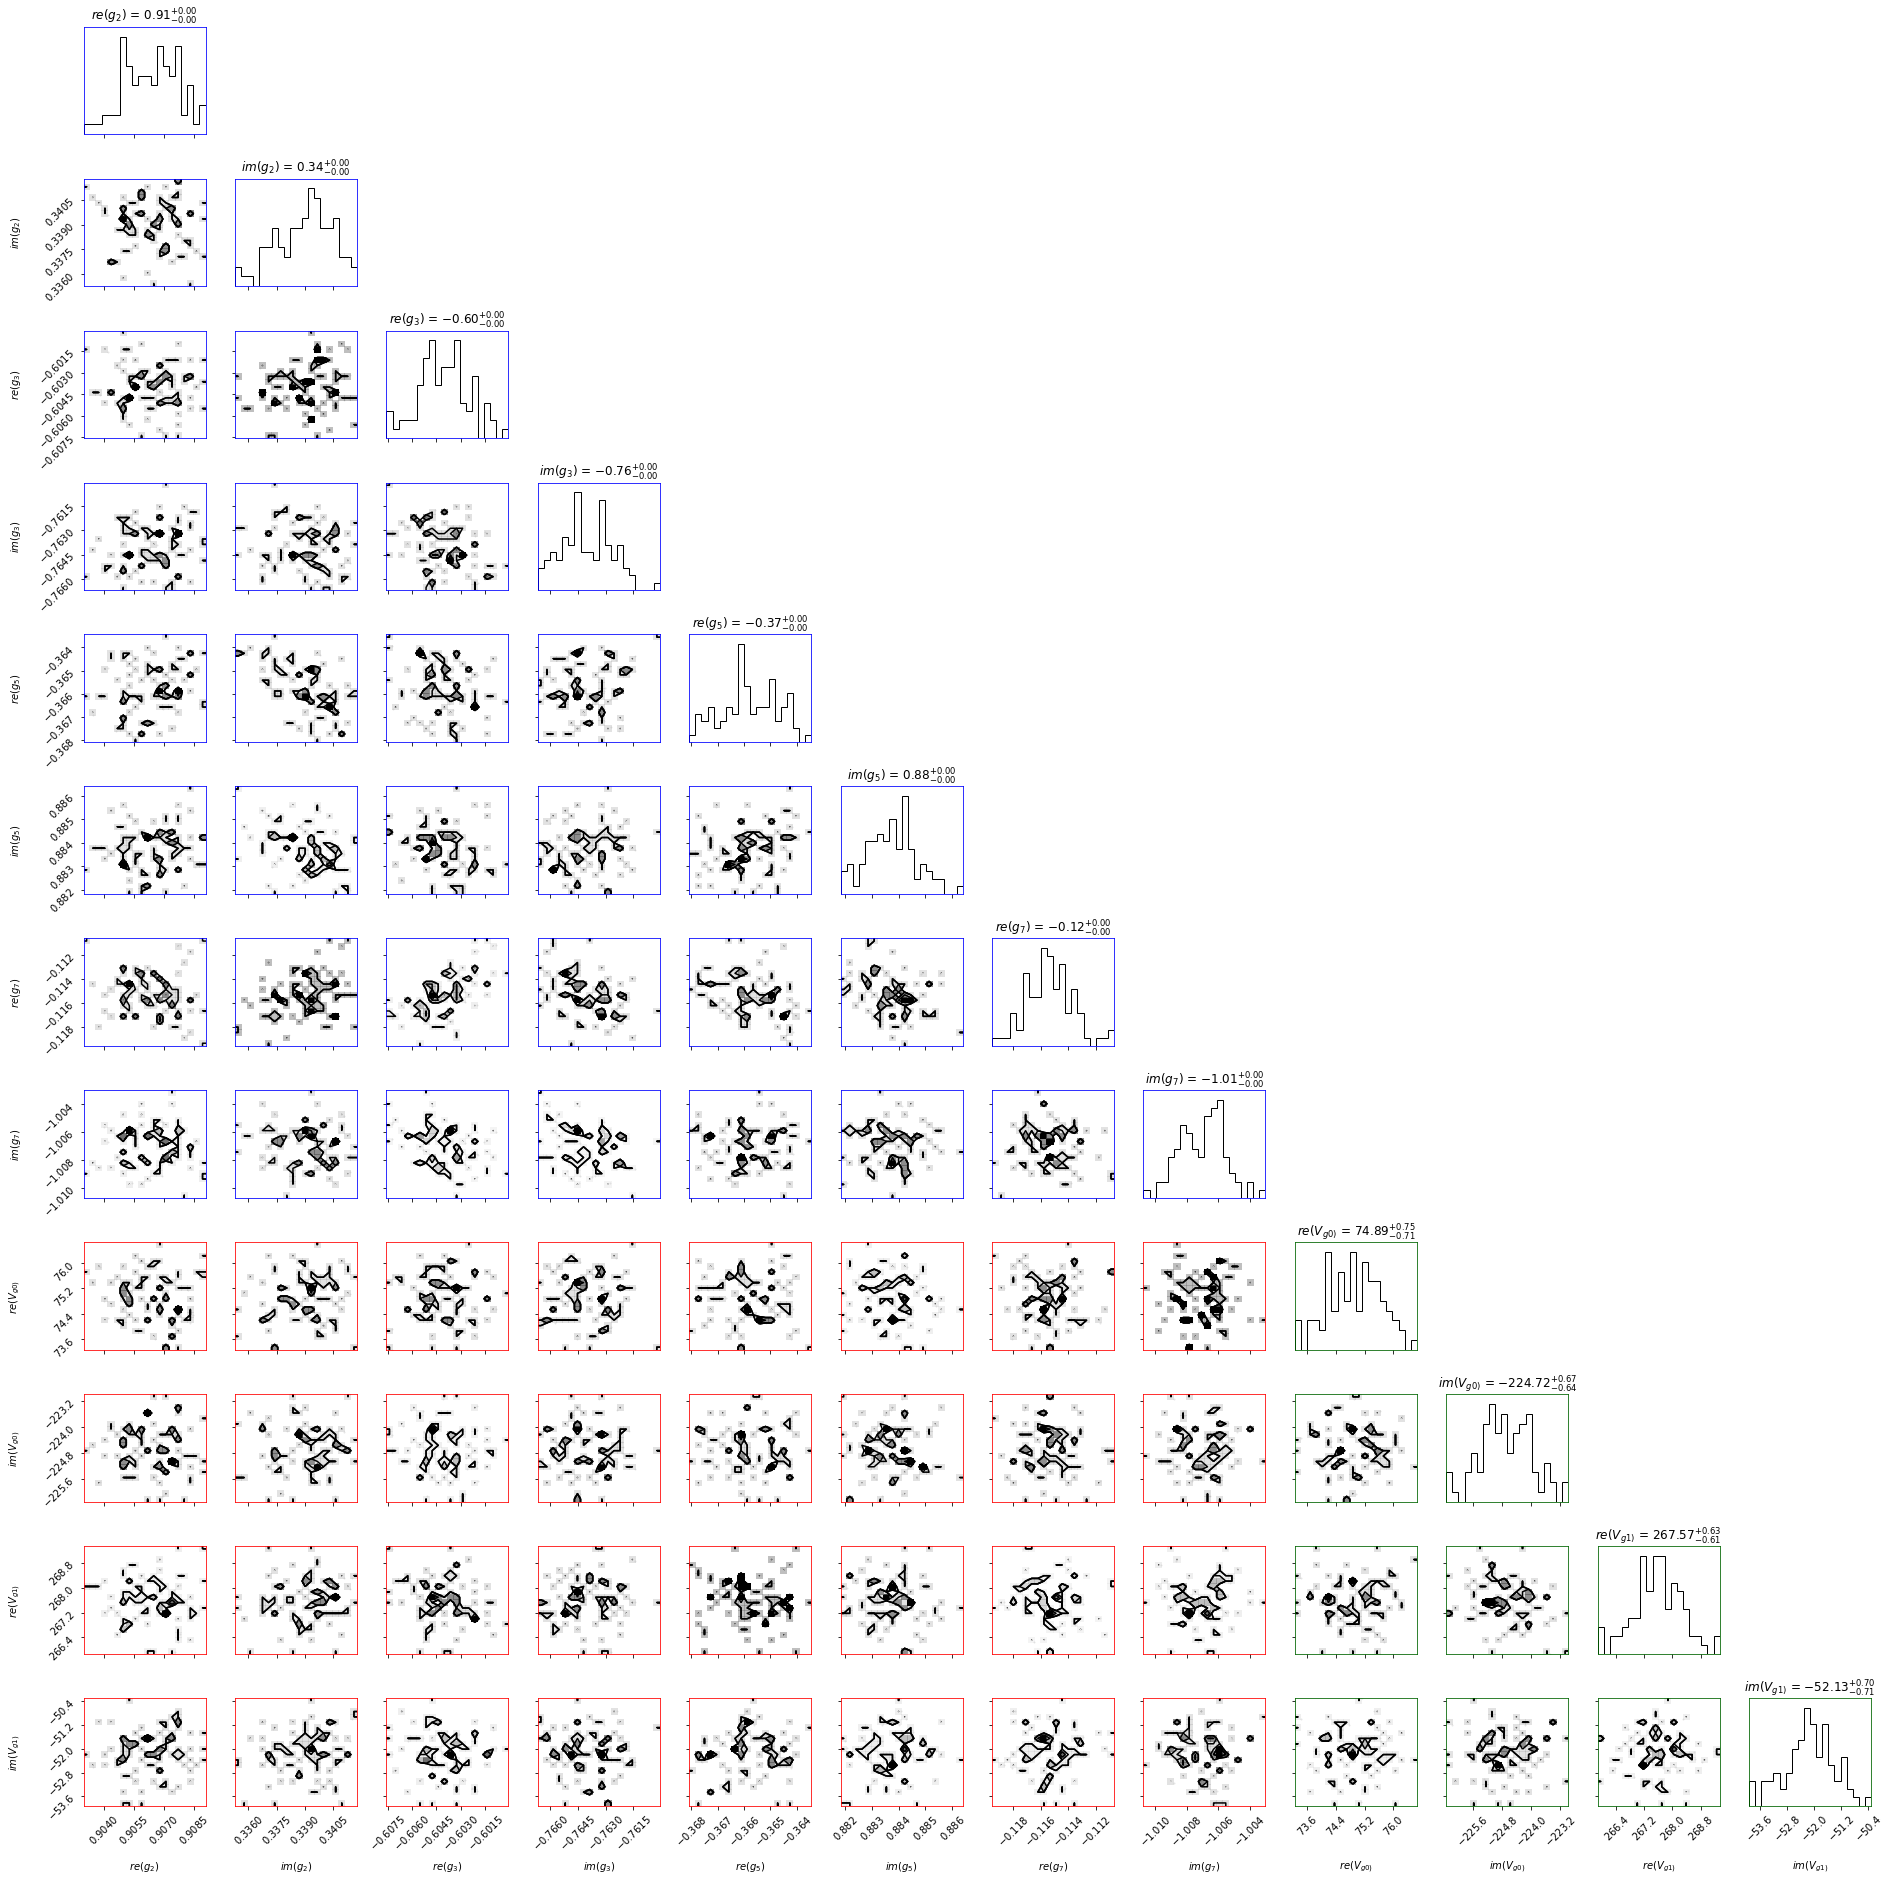

In [5]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 27], plot_to=name+"_corner1")

Plot corner
g values: 8, V values: 2


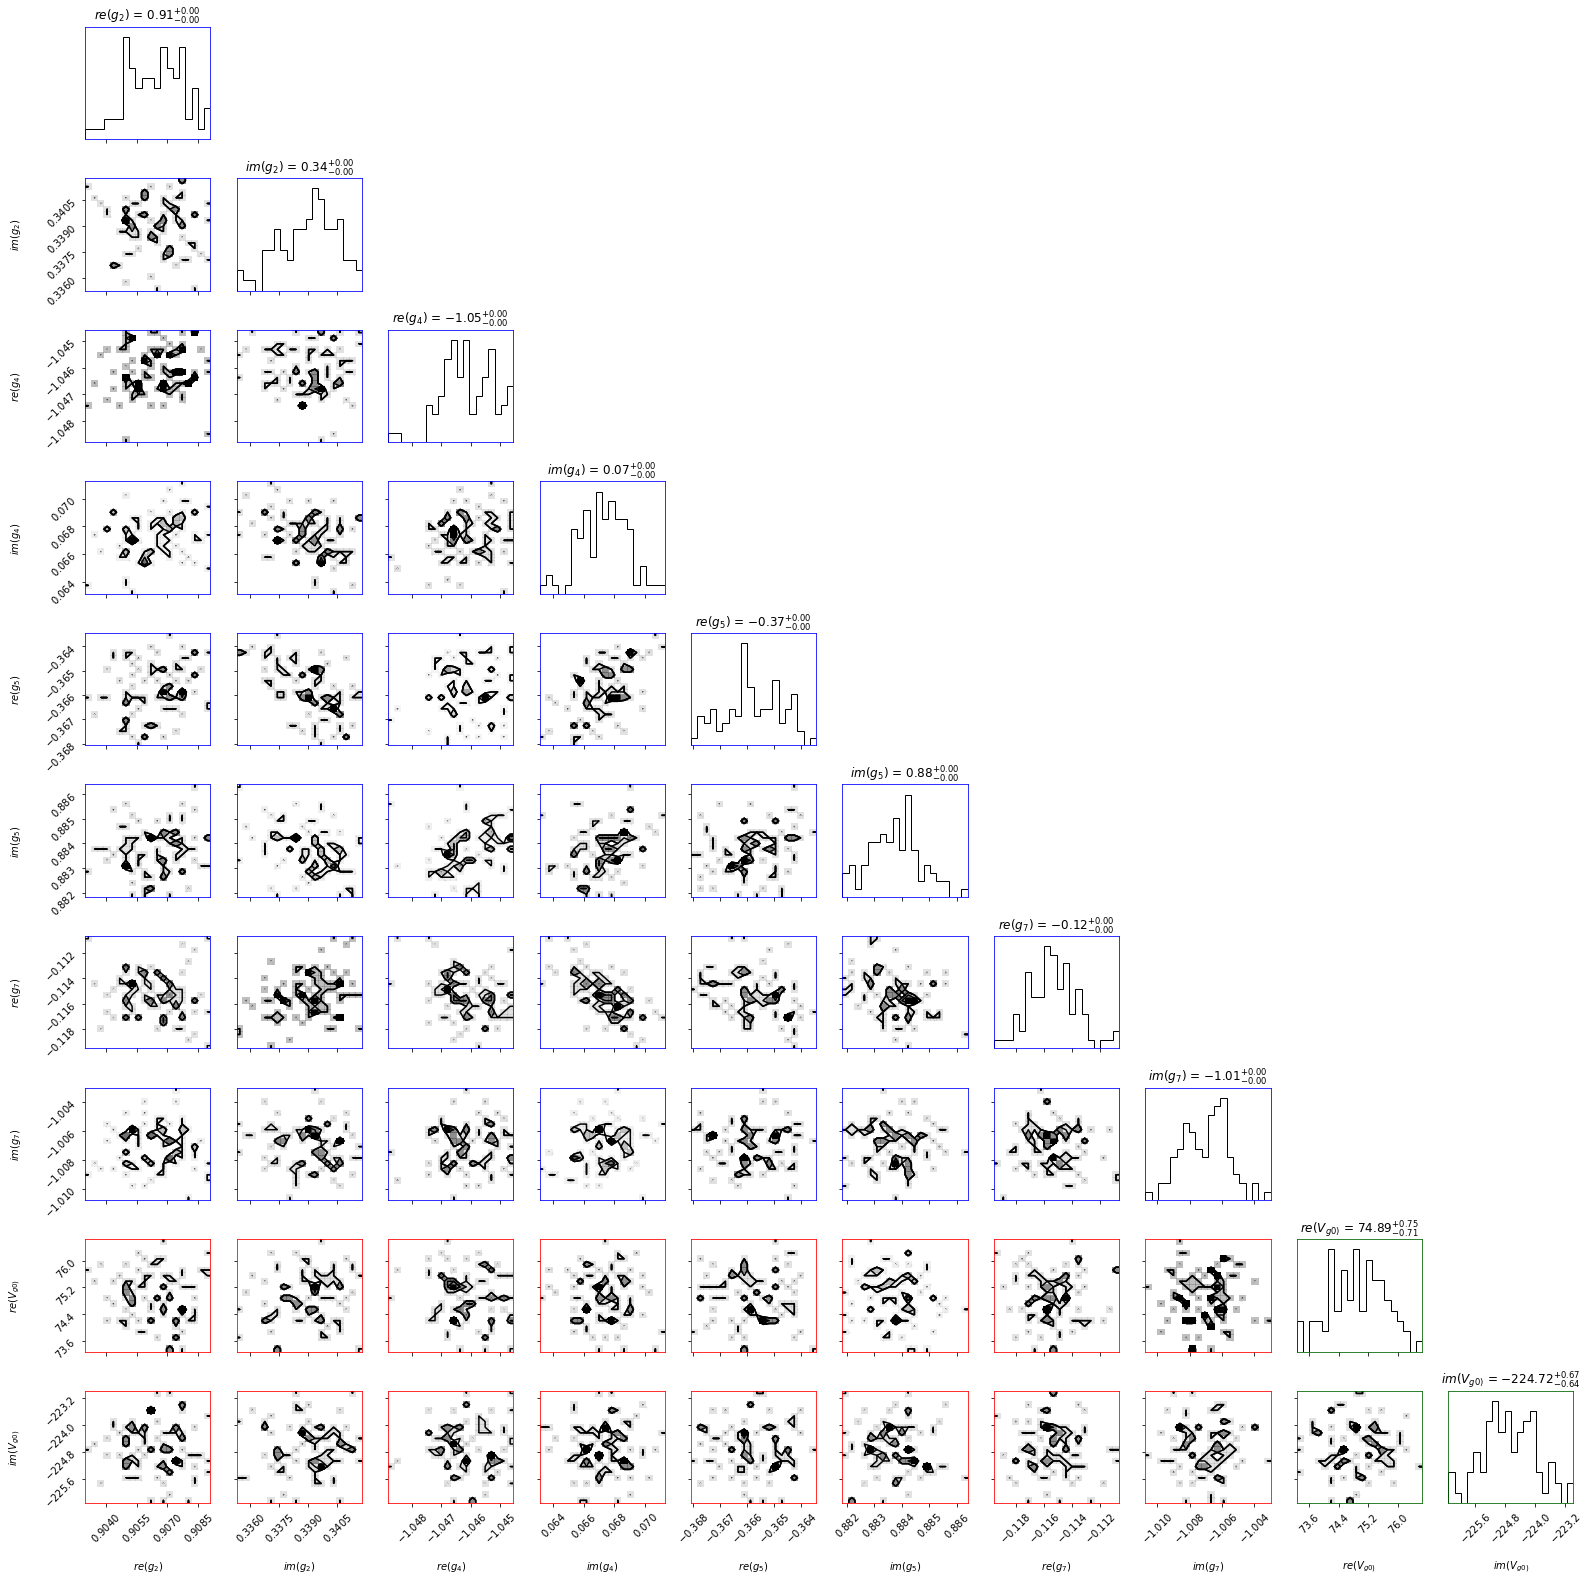

In [6]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 32], plot_to=name+"_corner2")

Plot corner
x values: 12, V values: 6


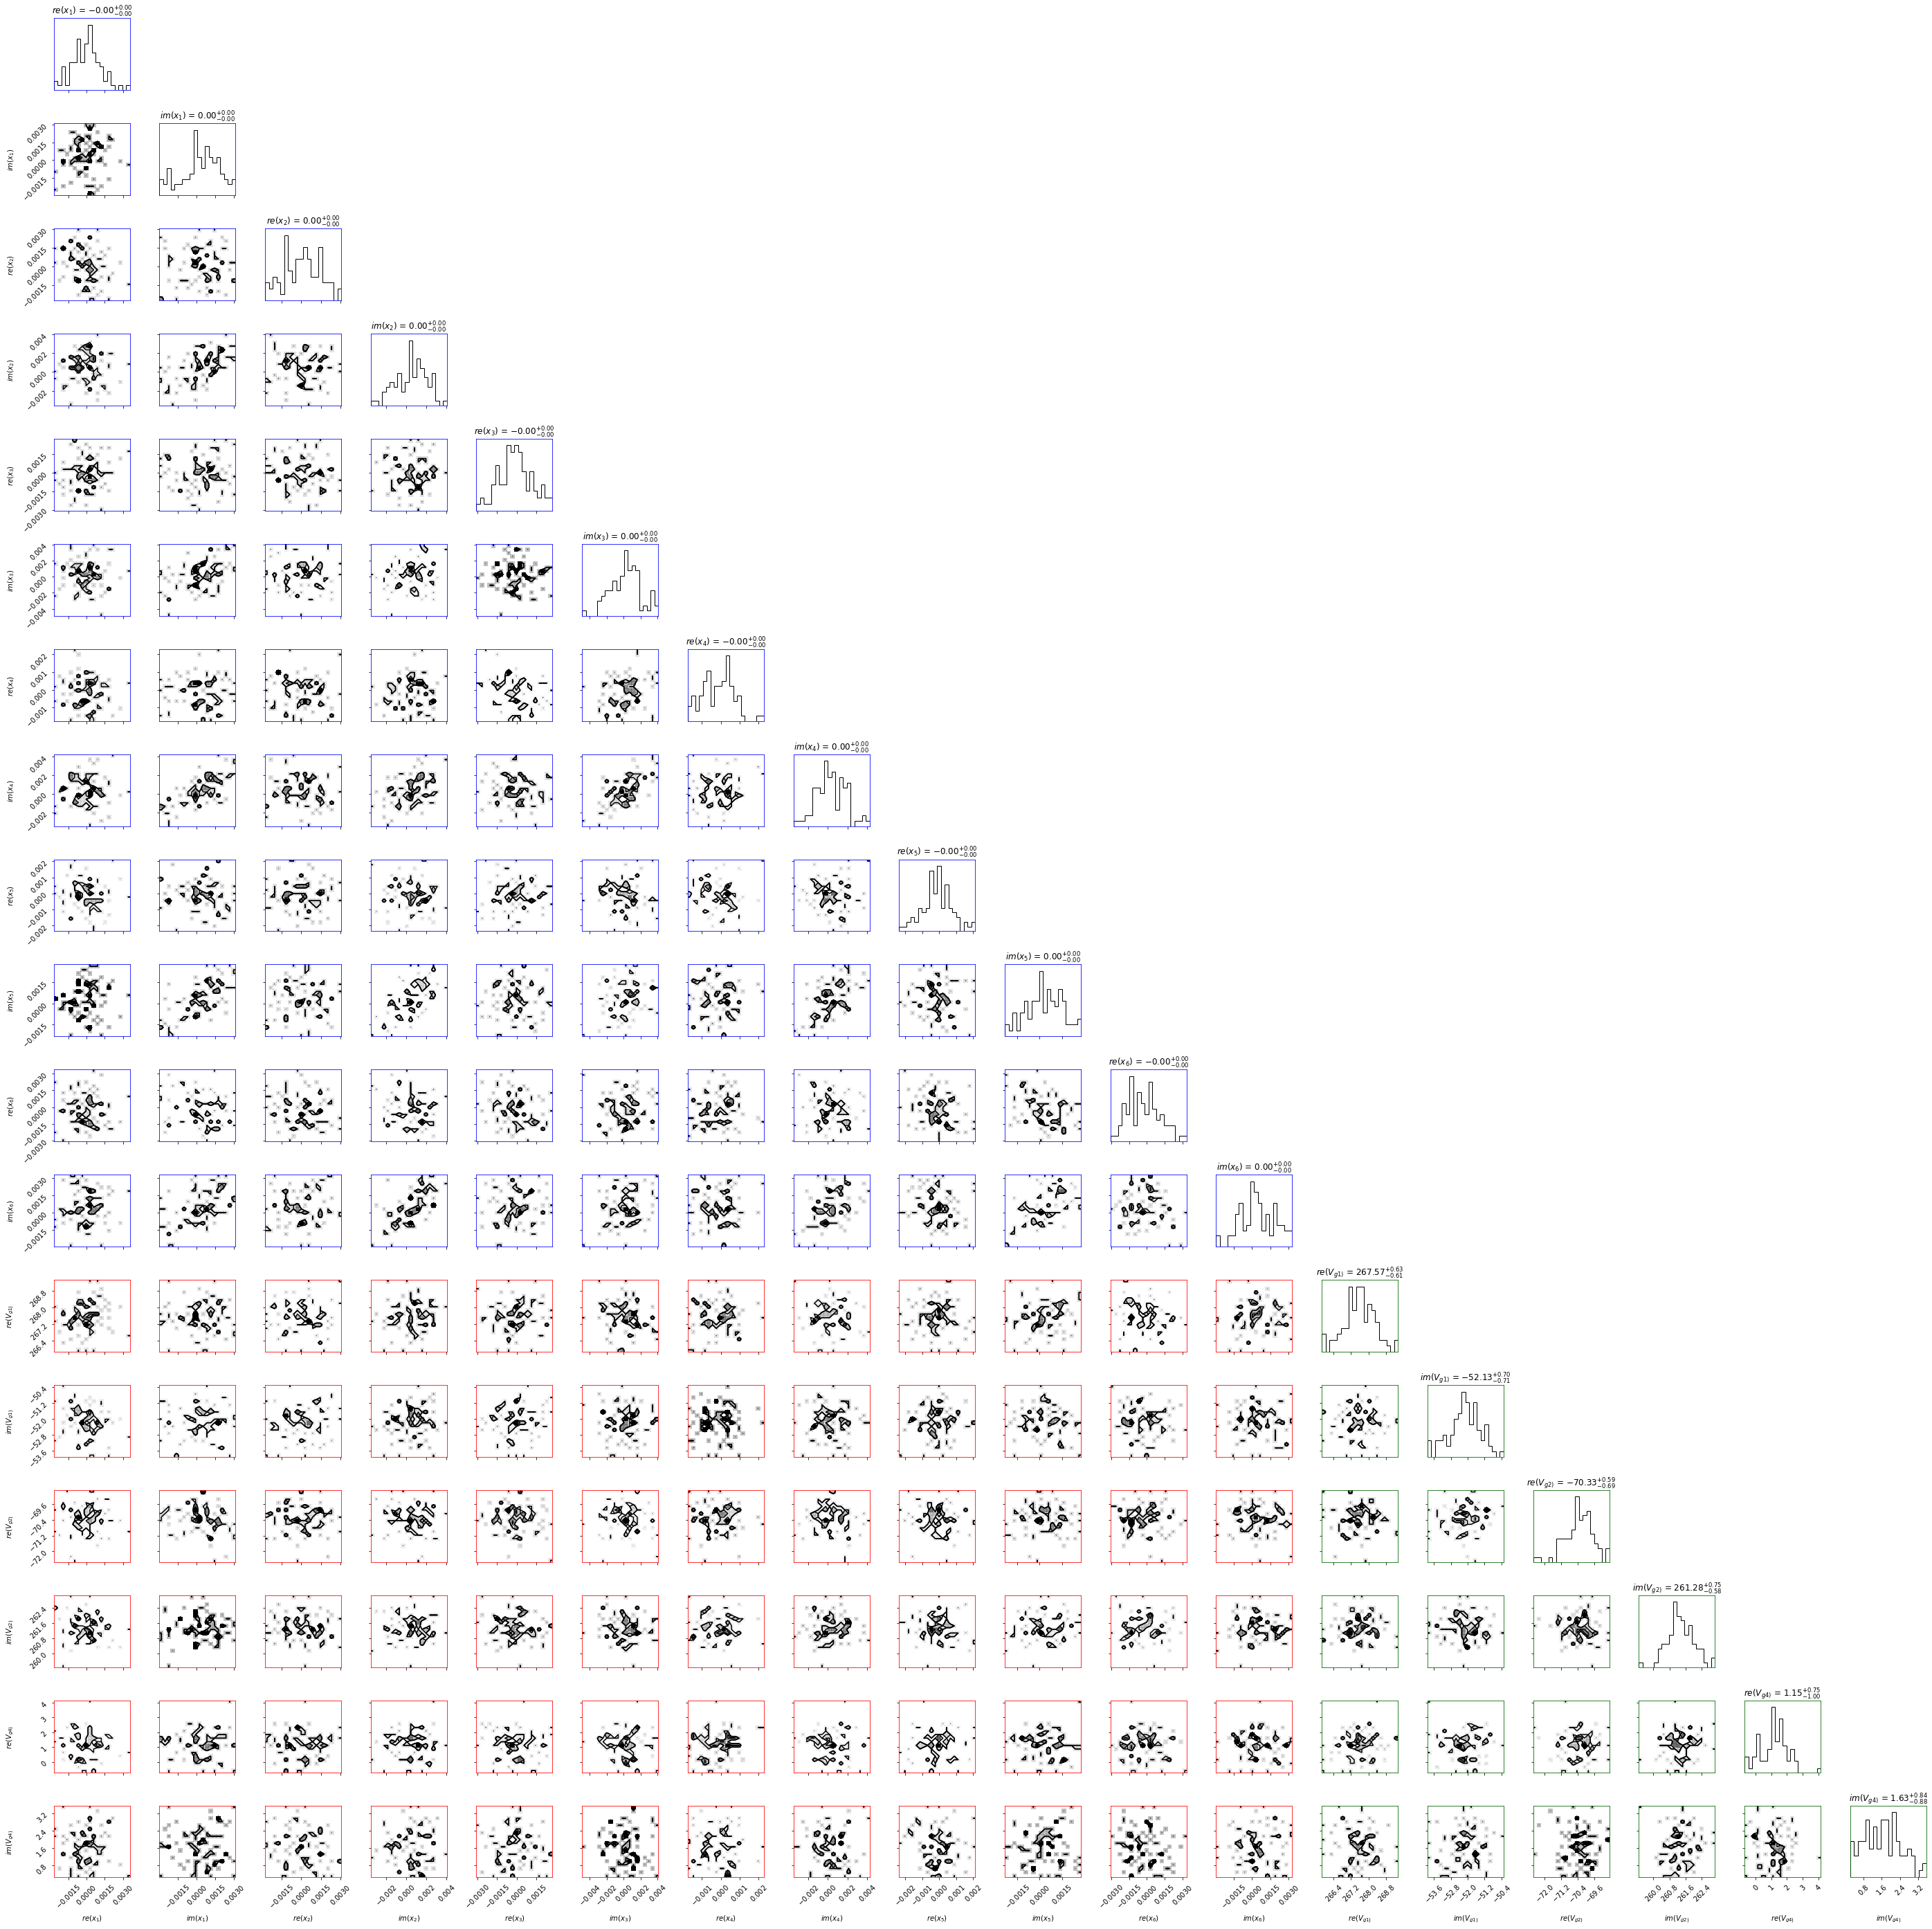

In [7]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[10, 20, 30])

Plot corner
x values: 7, V values: 6


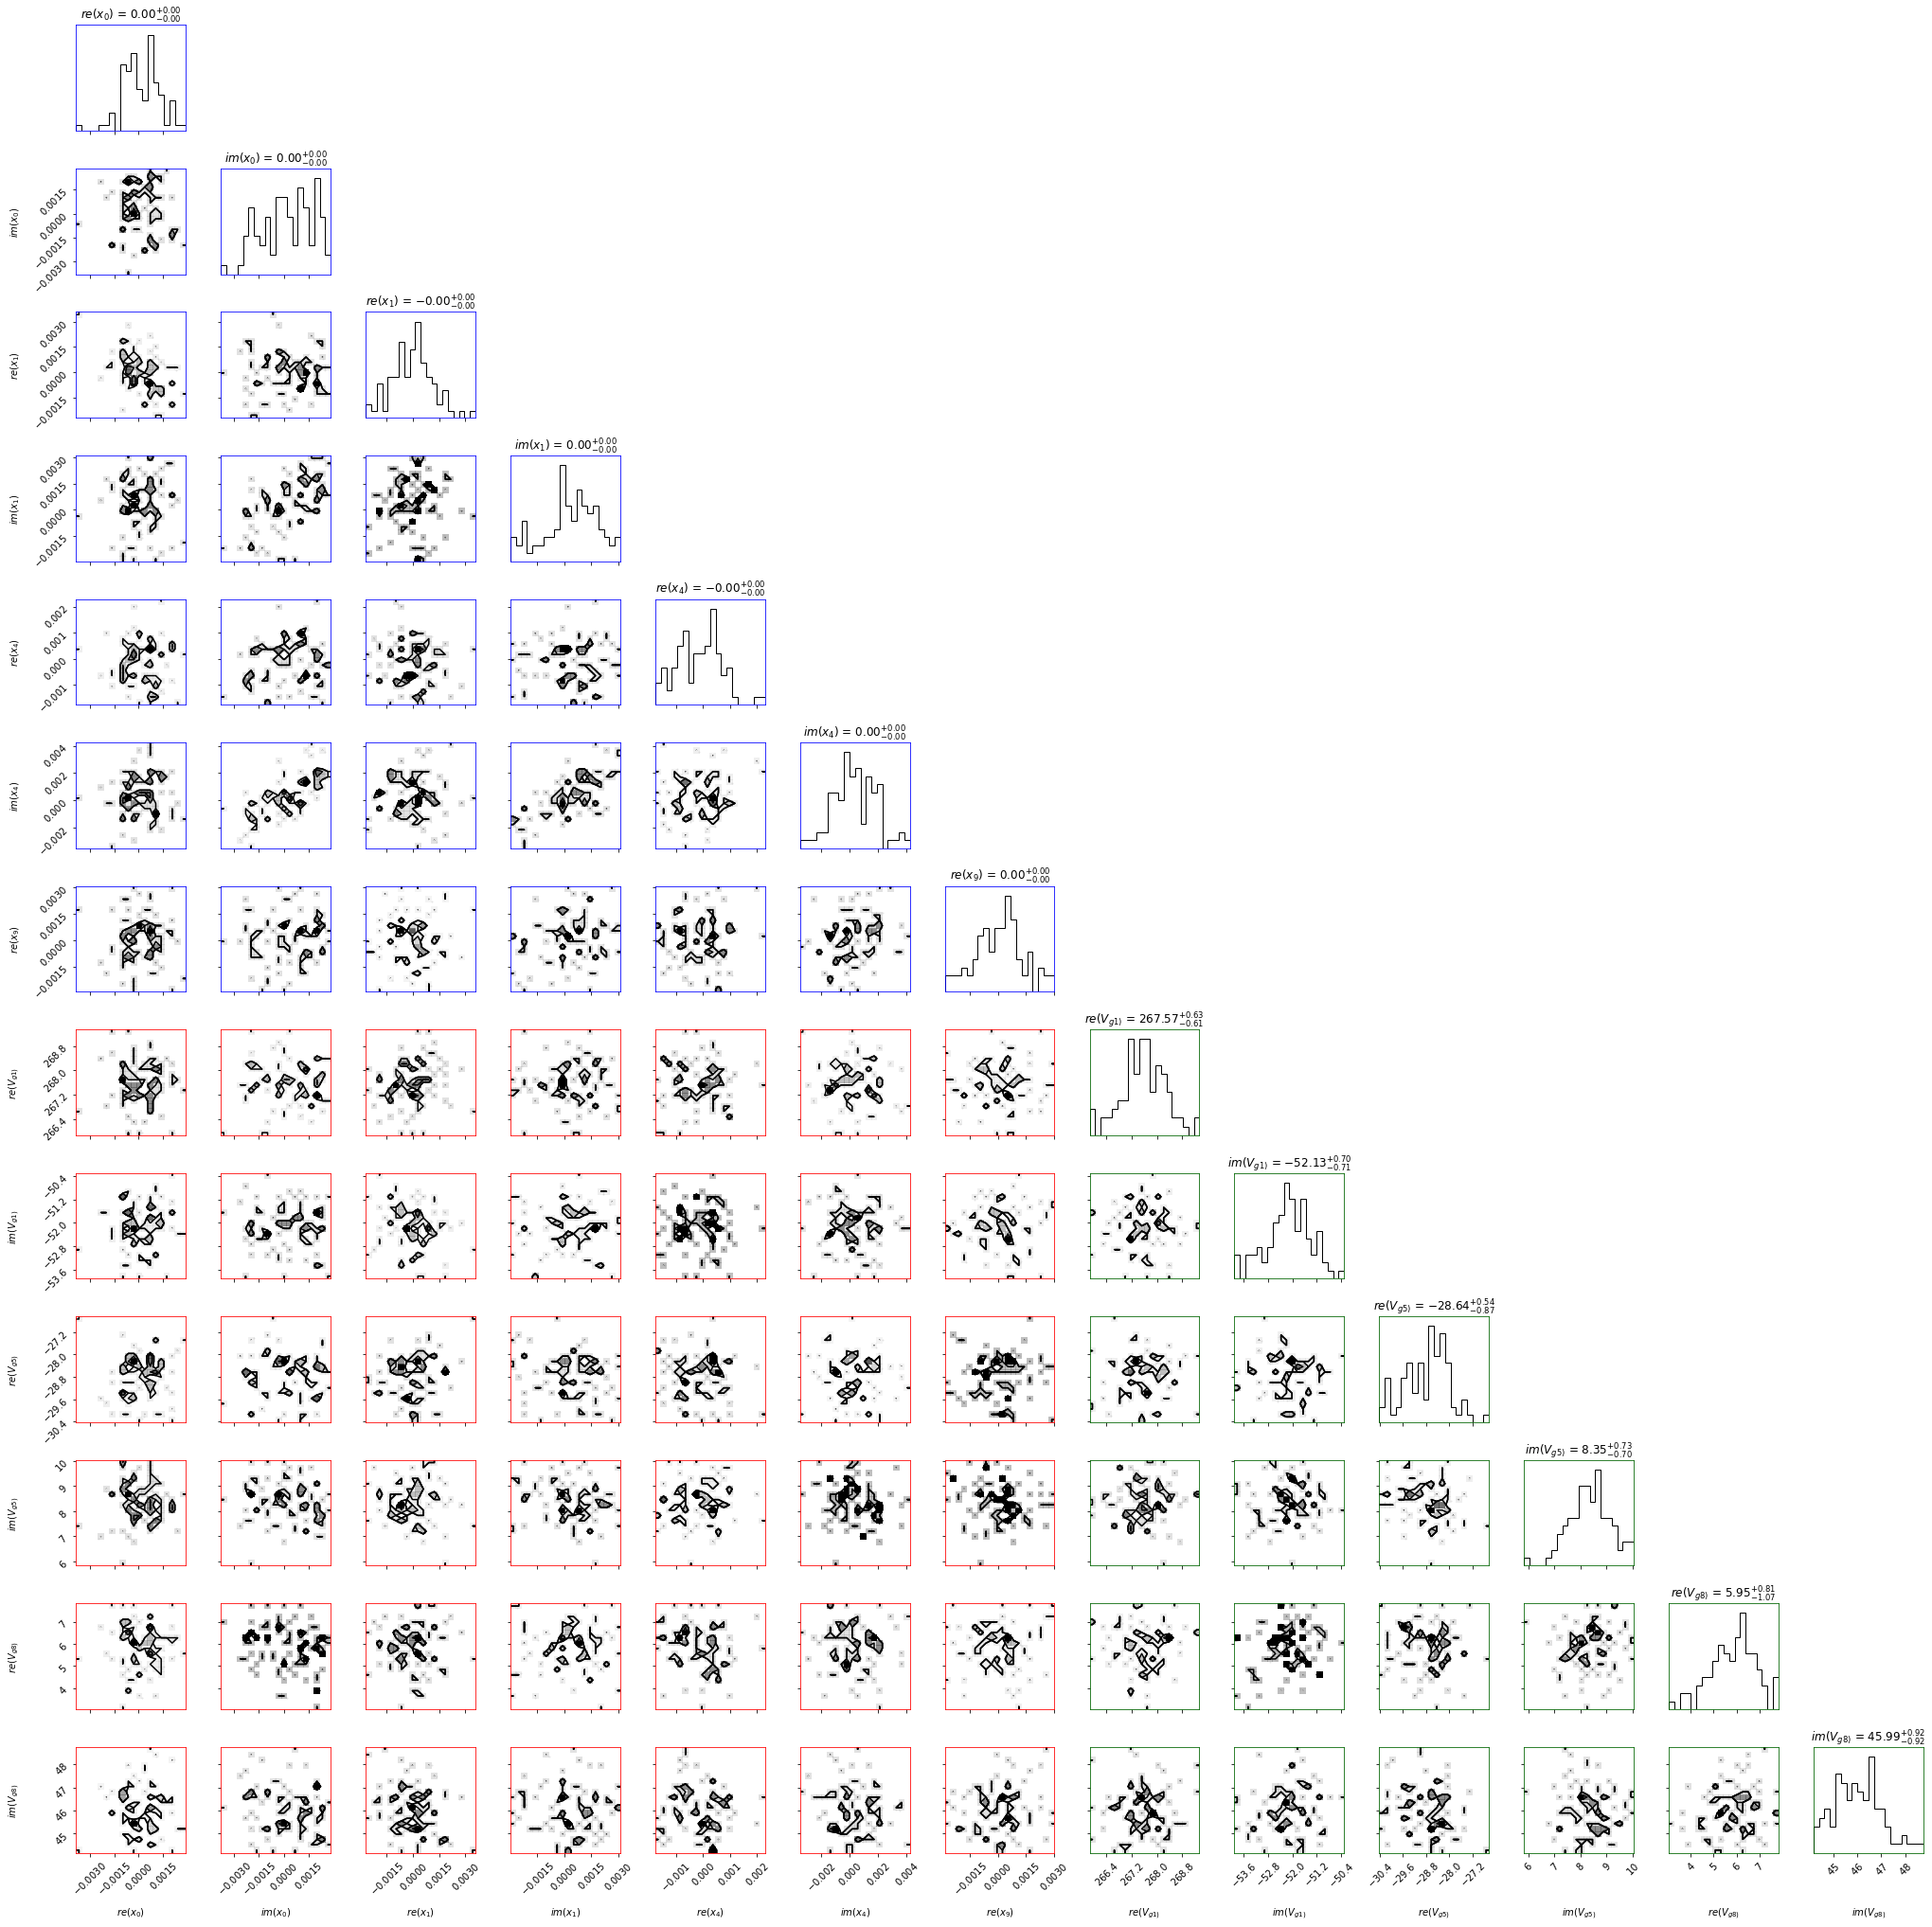

In [8]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[3, 16, 34])

Plotting correlation matrix
g values: 5120, V values: 7168
Matrix size (12288, 12288)
Mean: -0.000004 Sigma: 0.079160 Skew: 0.016241 Kurtosis: 4.823708
Min: -1.000000 Max: 1.000000
99.9 percentile: 0.399103
99 percentile: 0.261143
95 percentile: 0.181003
90 percentile: 0.140577
80 percentile: 0.092186
70 percentile: 0.057408


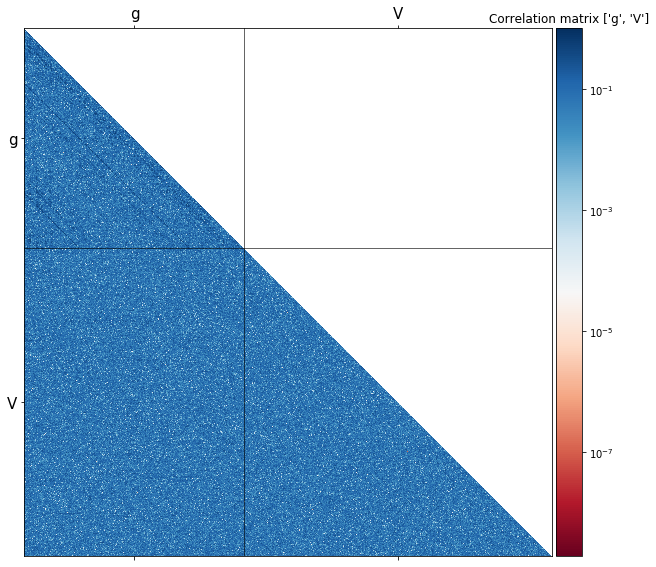

In [9]:
sampler.plot_covcorr(["g", "V"], log=True, plot_to=name+"_corr")

Plotting correlation matrix
x values: 4864, V values: 7168


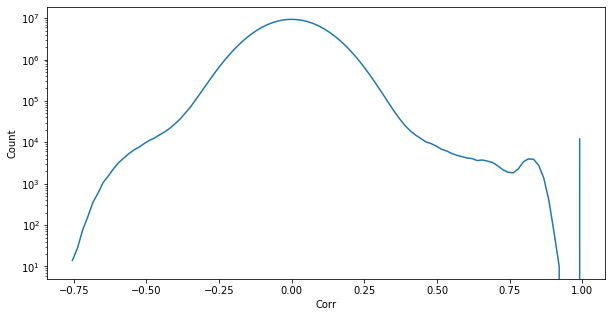

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_covcorr(["x", "V"], log=True, hist=True)

Plot marginals


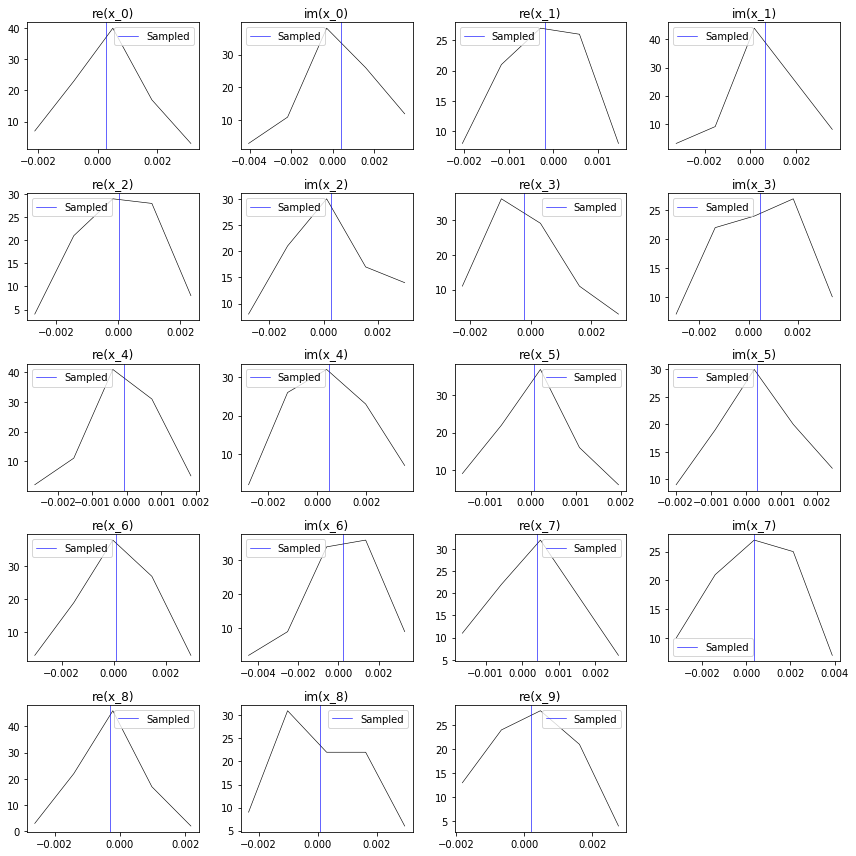

In [11]:
plt.rcParams['figure.figsize'] = [12, 12]
sampler.plot_marginals("x", cols=4, time=0, freq=0, which=["Sampled"])

Plot marginals


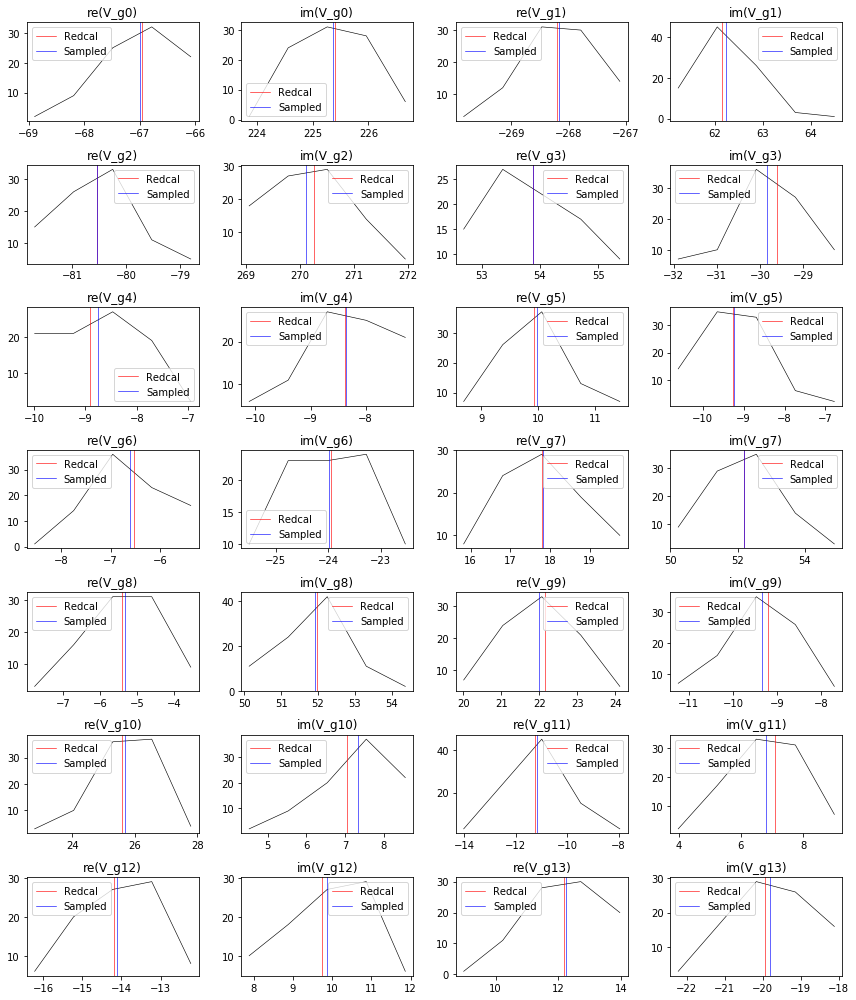

In [12]:
plt.rcParams['figure.figsize'] = [12, 14]
sampler.plot_marginals("V", cols=4, time=0, freq=0, which=["Redcal", "Sampled"])

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_one_over_time_freq("g", 5000, 6, time=6, plot_to=name+"_g_one_over1")

IndexError: index 5000 is out of bounds for axis 0 with size 90

In [ ]:
sampler.plot_one_over_time_freq("g", 5000, 6, freq=7, plot_to=name+"_g_one_over2")

In [ ]:
sampler.plot_one_over_time_freq("x", 5000, 6, time=6, plot_to=name+"_x_one_over1")

In [ ]:
sampler.plot_one_over_time_freq("x", 5000, 6, freq=7, plot_to=name+"_x_one_over2")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.plot_gains(time=6, freq=3, sigma=3, plot_to=name+"gains")

In [ ]:
sampler.print_sample_stats("x", time=3, freq=3)

In [ ]:
sampler.print_sample_stats("V", time=0, freq=6)

In [ ]:
sampler.examine_all_for_gaussianity()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.vis_redcal.plot_power_spectrum()

In [ ]:
sampler.vis_sampled.plot_power_spectrum()

In [ ]:
print("Finished /data/scratch/apw737/catall_nobright/sampled_viscatBC_side0.2")